## Site Energy Intensity Prediction

<img src = "https://www.activesustainability.com/media/815765/dia-mundial-eficiencia-energetica.jpg">

## Problem Description

Climate change is a globally relevant, urgent, and multi-faceted issue heavily impacted by energy policy and infrastructure. Addressing climate change involves mitigation (i.e. mitigating greenhouse gas emissions) and adaptation (i.e. preparing for unavoidable consequences). Mitigation of GHG emissions requires changes to electricity systems, transportation, buildings, industry, and land use.

For example, retrofitted buildings can reduce heating and cooling energy requirements by 50-90 percent. Many of these energy efficiency measures also result in overall cost savings and yield other benefits, such as cleaner air for occupants. This potential can be achieved while maintaining the services that buildings provide.




## Dataset

The WiDS Datathon dataset was created in collaboration with Climate Change AI (CCAI) and Lawrence Berkeley National Laboratory (Berkeley Lab). Participants will use a dataset consisting of variables that describe building characteristics and climate and weather variables for the regions in which the buildings are located. Accurate predictions of energy consumption can help policymakers target retrofitting efforts to maximize emissions reductions.



## Loading the Libraries

In [1]:
import numpy as np 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

## Preliminary Analysis

**Loading the Dataset**

In [21]:
df_train = pd.read_csv("train_Dataset.csv")

In [3]:
df_train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
df_train.shape

(75757, 64)

There are 75000 records and 64 features in the dataset

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

Out of the 64 features, 61 are numerical and 3 are of object type

`State_Factor`, `building_class` and `facility_type` are the object type features

## Top Level Summary Statistics

In [7]:
df_train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


**Observations**
* We can see thart the records range until the year 2015 and median year is 2015
* The energy ratings range from 0 to 100
* The elevation ranges from -6.4 m above sea level to 1924 m over sea level
* There are 260 days in the dataset with days_above 80F and 185 days with temperature above 90F
* There are around 30000 records having `days_with_fog` values
* site_eui values range from 1 to 997

In [9]:
df_train.describe(include = 'object')

,State_Factor,building_class,facility_type
count,75757,75757,75757
unique,7,2,60
top,State_6,Residential,Multifamily_Uncategorized
freq,50840,43558,39455


**Obsevation**
* There are no missing values.
* There are 2 types of `building_classes` and 60 types of `facility_types`
* The top values for `State_Factor` is `State_6` 
* The top values for `Building_Class` is Residential
* The top values for `facility_type` is `Multifamily_Uncategorized`

Text(0.5, 1.02, 'Percent of data belonging to each year in the train set')

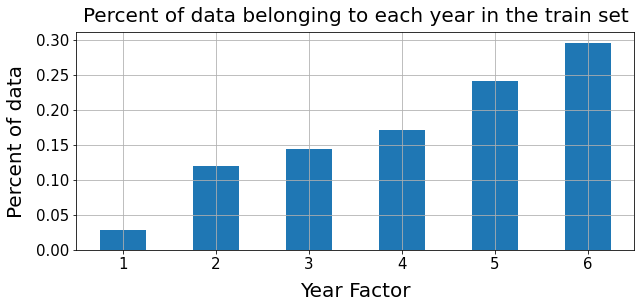

In [11]:
df_train['Year_Factor'].value_counts(normalize = True).sort_values().plot(kind='bar', figsize=(10,4), rot=0)

plt.xlabel("Year Factor", labelpad=10, fontsize=20)
plt.ylabel("Percent of data", labelpad=10, fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title("Percent of data belonging to each year in the train set", y=1.02, fontsize=20)


`year_factor` is basically the year of making observation

Maximum amount of the records are from year 6

Interesting Fact is that there is only **one year** year 7 for which we need to predict values in the test set

Text(0.5, 1.02, 'Percent of data belonging to each year in the test set')

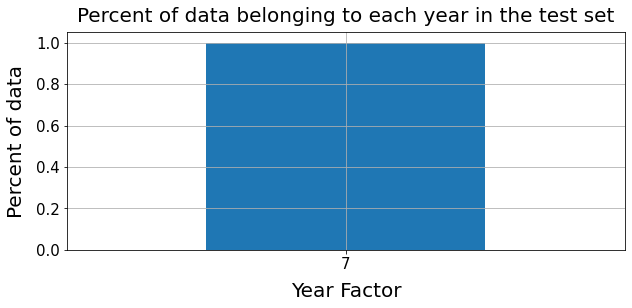

In [15]:
df_test = pd.read_csv('x_test.csv')
df_test['Year_Factor'].value_counts(normalize = True).sort_values().plot(kind='bar', figsize=(10,4), rot=0)

plt.xlabel("Year Factor", labelpad=10, fontsize=20)
plt.ylabel("Percent of data", labelpad=10, fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title("Percent of data belonging to each year in the test set", y=1.02, fontsize=20)


**Are there any outliers in the site_eui target feature?**

Text(0.5, 1.02, 'Year wise site eui')

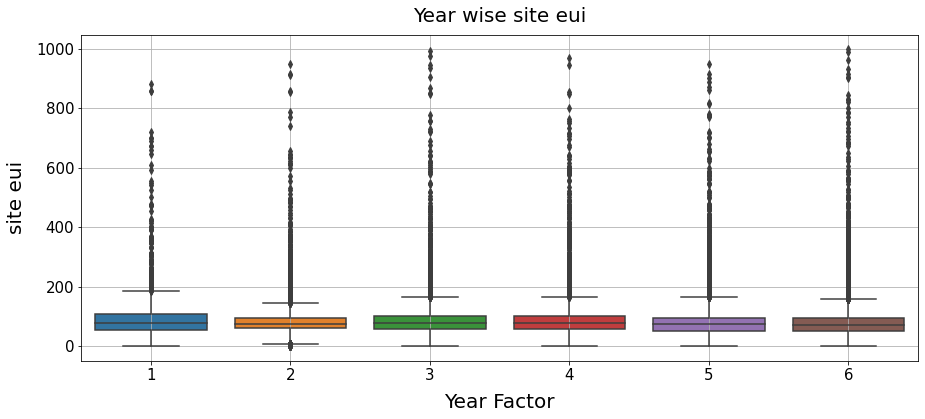

In [23]:
plt.figure(figsize = (15,6))
sns.boxplot(x = df_train['Year_Factor'], y= df_train['site_eui'])
plt.xlabel("Year Factor", labelpad=10, fontsize=20)
plt.ylabel("site eui", labelpad=10, fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title("Year wise site eui", y=1.02, fontsize=20)

Yes, we can see that somewhere beyond 200 `site_eui` we have outliers

The median values look like they are same for all year factors right. Let's take a look at them more carefully

Text(0.5, 1.02, 'Year wise site eui')

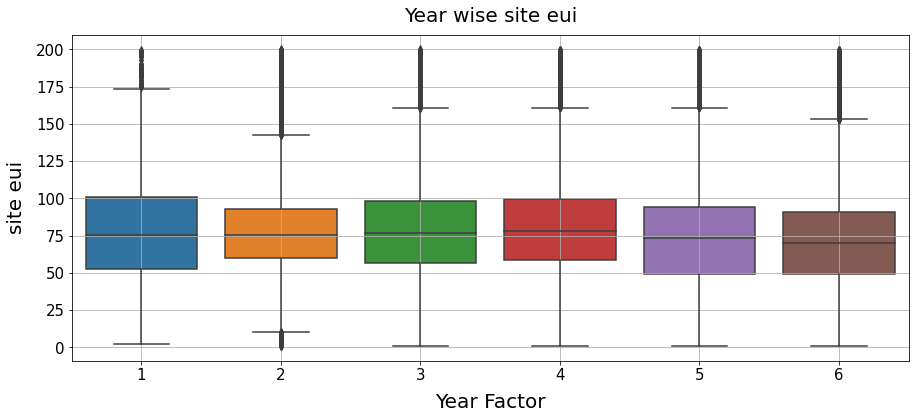

In [25]:
plt.figure(figsize = (15,6))
df = df_train[df_train['site_eui'] <= 200]
sns.boxplot(x = df['Year_Factor'], y= df['site_eui'])
plt.xlabel("Year Factor", labelpad=10, fontsize=20)
plt.ylabel("site eui", labelpad=10, fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.grid()
plt.title("Year wise site eui", y=1.02, fontsize=20)


The median of site_eui is 75 for year factors 1 through 6

In [ ]:
! jupyter labextension install jupyterlab-plotly

In [30]:
fig = px.histogram(df_train, x='site_eui', color='Year_Factor')
fig.update_layout(title_text='Year wise distribution of site energy usage', title_x=0.5, title_y=1, margin=dict(t=30, l=30, r=30, b=30))
fig.show()